# Scatter Chart


This section showcases the scatter chart. It contains examples of how to create scatter charts using the [datachart.charts.ScatterChart](/references/charts#datachart.charts.ScatterChart) function.

The examples sequentially build on each other, going from simple to complex.


As mentioned above, the scatter charts are created using the `ScatterChart` function found in the [datachart.charts](datachart.charts) module. Let's import it:


In [1]:
from datachart.charts import ScatterChart

<div class="admonition note">
    <p class="admonition-title">Double figure generation avoidence</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        To avoid double figure generation, the <code>ScatterChart</code> function is preceded by the <code>_ =</code> operator. The double figures are generated because <code>ScatterChart</code> returns the <code>plt.Figure</code> object, which is then used to save the figure locally.
    </p>
</div>


## Scatter Chart Input Attributes

The `ScatterChart` function accepts keyword arguments for chart configuration. The main argument is `data`, which contains the data points. For a single scatter chart, `data` is a list of dictionaries. For multiple scatter charts, `data` is a list of lists.

```python
ScatterChart(
    data=[{                                             # A list of scatter data points (or list of lists for multiple charts)
        "x":    Union[int, float],                      # The x-axis value
        "y":    Union[int, float],                      # The y-axis value
        "size": Optional[Union[int, float]],            # The marker size value (for bubble charts)
        "hue":  Optional[str],                          # The category for color grouping
    }],
    style={                                             # The style of the scatter markers (optional)
        "plot_scatter_color":      Union[str, None],    # The color of the markers (hex color code)
        "plot_scatter_alpha":      Union[float, None],  # The alpha of the markers (how visible they are)
        "plot_scatter_size":       Union[int, float, None], # The size of the markers
        "plot_scatter_marker":     Union[LINE_MARKER, None], # The marker shape
        "plot_scatter_zorder":     Union[int, float, None], # The z-order of the markers
        "plot_scatter_edge_width": Union[int, float, None], # The edge width of the markers
        "plot_scatter_edge_color": Union[str, None],   # The edge color of the markers (hex color code)
    },
    subtitle=Optional[str],                             # The subtitle of the chart (or list for multiple charts)
    title=Optional[str],                                # The title of the chart
    xlabel=Optional[str],                               # The x-axis label
    ylabel=Optional[str],                               # The y-axis label

    x=Optional[str],                                    # The key name in data for x-axis values (default: "x")
    y=Optional[str],                                    # The key name in data for y-axis values (default: "y")
    size=Optional[str],                                 # The key name in data for marker size (bubble charts)
    hue=Optional[str],                                  # The key name in data for color grouping
    size_range=Optional[Tuple[float, float]],           # The (min_size, max_size) range for bubble charts

    show_regression=Optional[bool],                     # Whether to show the regression line
    show_ci=Optional[bool],                             # Whether to show the confidence interval
    ci_level=Optional[float],                           # The confidence interval level (default: 0.95)

    xticks=Optional[List[Union[int, float]]],           # the x-axis ticks
    xticklabels=Optional[List[str]],                    # the x-axis tick labels (must be same length as xticks)
    xtickrotate=Optional[int],                          # the x-axis tick labels rotation
    yticks=Optional[List[Union[int, float]]],           # the y-axis ticks
    yticklabels=Optional[List[str]],                    # the y-axis tick labels (must be same length as yticks)
    ytickrotate=Optional[int],                          # the y-axis tick labels rotation

    vlines=Optional[Union[dict, List[dict]]],           # the vertical lines
    hlines=Optional[Union[dict, List[dict]]],           # the horizontal lines
)
```


For more details, see the [datachart.typings.ScatterChartAttrs](/references/typings/#datachart.typings.ScatterChartAttrs) type.


## Single Scatter Chart


In this part, we show how to create a single scatter chart using the `ScatterChart` function.

Let us first import the necessary libraries:


In [2]:
import random
import numpy as np

**Basic example.** Let us first create a basic scatter chart showing random data points.

The following example shows how only the `data` argument is required to draw the scatter chart.


In [3]:
NUM_OF_POINTS = 50

In [4]:
chart_data = [
    {"x": random.uniform(0, 10), "y": random.uniform(0, 10)}
    for _ in range(NUM_OF_POINTS)
]

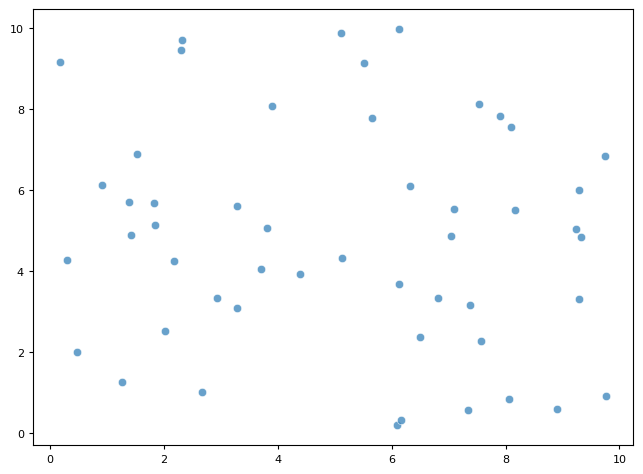

In [5]:
_ = ScatterChart(
    # add the data to the chart
    data=chart_data
)

### Chart title and axis labels

To add the chart title and axis labels, simply add the `title`, `xlabel` and `ylabel` attributes.


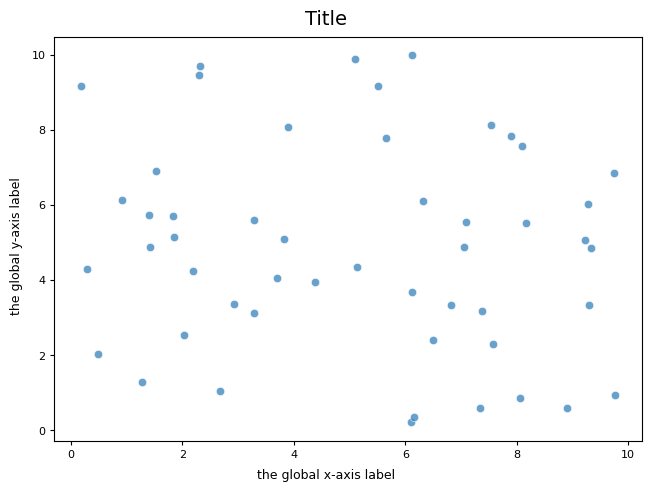

In [6]:
_ = ScatterChart(
    data=chart_data,
    # add the title
    title="Title",
    # add the x and y axis labels
    xlabel="the global x-axis label",
    ylabel="the global y-axis label"
)

### Figure size and grid

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. The `datachart` package provides a [datachart.constants.FIG_SIZE](/references/constants/#datachart.constants.FIG_SIZE) constant, which contains some of the predefined figure sizes.

To add the grid, simply add the `show_grid` attribute. The possible options are:

| Option | Description |
| --- | --- |
| `"both"` | shows both the x-axis and the y-axis gridlines. |
| `"x"` | shows only the x-axis grid lines. |
| `"y"` | shows only the y-axis grid lines. |

Again, `datachart` provides a [datachart.constants.SHOW_GRID](/references/constants/#datachart.constants.SHOW_GRID) constant, which contains the supported options.


In [7]:
from datachart.constants import FIG_SIZE, SHOW_GRID

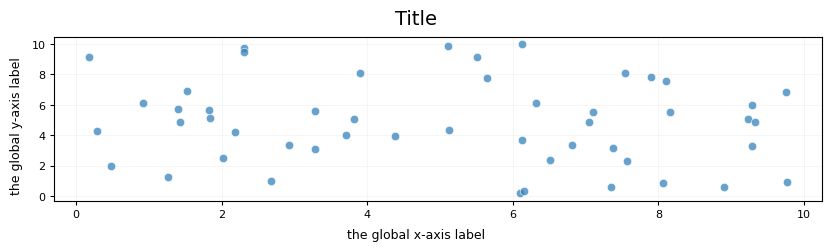

In [8]:
_ = ScatterChart(
    data=chart_data,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    # add to determine the figure size
    figsize=FIG_SIZE.A4_NARROW,
    # add to show the grid lines
    show_grid=SHOW_GRID.BOTH
)

### Scatter style

To change the scatter marker style simply add the `style` attribute with the corresponding attributes. The supported attributes are shown in the [datachart.typings.ScatterStyleAttrs](/references/typings/#datachart.typings.ScatterStyleAttrs) type, which contains the following attributes:

| Attribute | Description |
| :-------- | :---------- |
| `"plot_scatter_color"`       | The color of the markers (hex color code). |
| `"plot_scatter_alpha"`       | The alpha of the markers (how visible they are). |
| `"plot_scatter_size"`        | The size of the markers. |
| `"plot_scatter_marker"`      | The marker shape. |
| `"plot_scatter_zorder"`      | The zorder of the markers. |
| `"plot_scatter_edge_width"` | The edge width of the markers. |
| `"plot_scatter_edge_color"` | The edge color of the markers (hex color code). |

Again, to help with the style settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant | Description |
| :------- | :---------- |
| [datachart.constants.LINE_MARKER](/references/constants/#datachart.constants.LINE_MARKER) | The marker shape (circle, square, etc.) |


In [9]:
from datachart.constants import LINE_MARKER

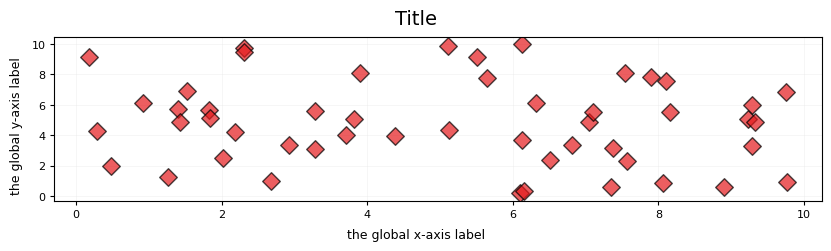

In [10]:
_ = ScatterChart(
    data=chart_data,
    # define the style of the markers
    style={
        "plot_scatter_color": "#e41a1c",
        "plot_scatter_alpha": 0.7,
        "plot_scatter_size": 80,
        "plot_scatter_marker": LINE_MARKER.DIAMOND,
        "plot_scatter_edge_width": 1,
        "plot_scatter_edge_color": "#000000",
    },
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
)

### Hue grouping (color by category)

To color the scatter points by a categorical variable, use the `hue` parameter. The `hue` parameter specifies which key in the data dictionaries contains the category values. Each unique category will be assigned a different color automatically.


In [11]:
categories = ["A", "B", "C"]
chart_data_with_hue = [
    {
        "x": random.uniform(0, 10),
        "y": random.uniform(0, 10),
        "category": random.choice(categories)
    }
    for _ in range(NUM_OF_POINTS)
]

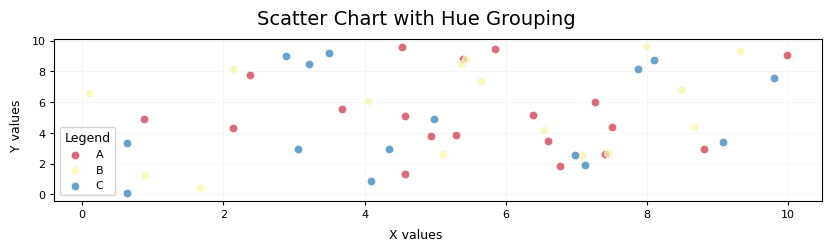

In [12]:
_ = ScatterChart(
    data=chart_data_with_hue,
    # specify the key containing category values
    hue="category",
    title="Scatter Chart with Hue Grouping",
    xlabel="X values",
    ylabel="Y values",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
    # show the legend to see category labels
    show_legend=True,
)

### Bubble chart (size variable)

To create a bubble chart where marker sizes vary based on a data variable, use the `size` parameter. The `size` parameter specifies which key in the data dictionaries contains the size values.

Use the `size_range` parameter to control the minimum and maximum marker sizes. The default range is `(20, 200)`.


In [13]:
chart_data_bubble = [
    {
        "x": random.uniform(0, 10),
        "y": random.uniform(0, 10),
        "population": random.uniform(100, 1000)
    }
    for _ in range(NUM_OF_POINTS)
]

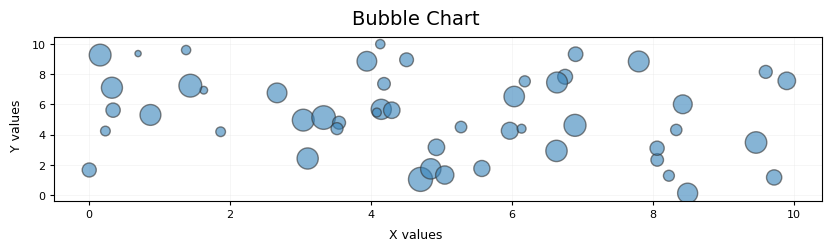

In [14]:
_ = ScatterChart(
    data=chart_data_bubble,
    # specify the key containing size values
    size="population",
    # control the size range of the bubbles
    size_range=(20, 300),
    style={
        "plot_scatter_alpha": 0.6,
        "plot_scatter_edge_width": 1,
        "plot_scatter_edge_color": "#333333",
    },
    title="Bubble Chart",
    xlabel="X values",
    ylabel="Y values",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
)

You can combine both `hue` and `size` to create a bubble chart with color grouping:


In [15]:
chart_data_bubble_hue = [
    {
        "x": random.uniform(0, 10),
        "y": random.uniform(0, 10),
        "population": random.uniform(100, 1000),
        "region": random.choice(["North", "South", "East", "West"])
    }
    for _ in range(NUM_OF_POINTS)
]

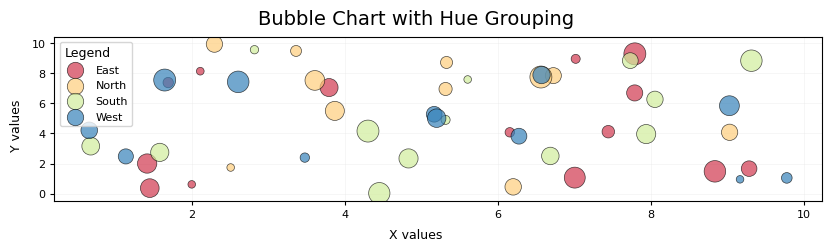

In [16]:
_ = ScatterChart(
    data=chart_data_bubble_hue,
    size="population",
    hue="region",
    size_range=(30, 250),
    style={
        "plot_scatter_alpha": 0.7,
        "plot_scatter_edge_width": 0.5,
        "plot_scatter_edge_color": "#000000",
    },
    title="Bubble Chart with Hue Grouping",
    xlabel="X values",
    ylabel="Y values",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
    show_legend=True,
)

### Regression line

To show a linear regression line through the scatter points, use the `show_regression` parameter. You can also display a confidence interval around the regression line using `show_ci`, and control the confidence level with `ci_level` (default is 0.95).


In [17]:
# create data with a linear relationship plus noise
chart_data_regression = [
    {
        "x": x,
        "y": 2 * x + 5 + random.gauss(0, 3)
    }
    for x in np.linspace(0, 10, NUM_OF_POINTS)
]

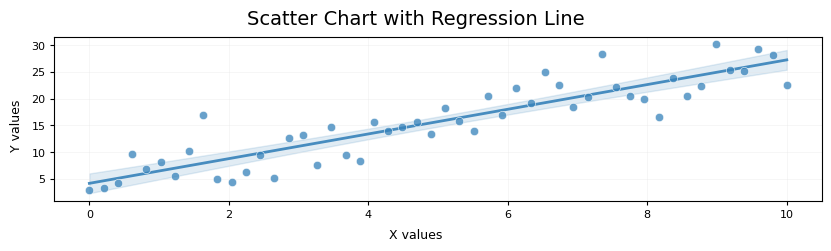

In [18]:
_ = ScatterChart(
    data=chart_data_regression,
    # show the regression line
    show_regression=True,
    # show the confidence interval
    show_ci=True,
    # set the confidence level (95%)
    ci_level=0.95,
    title="Scatter Chart with Regression Line",
    xlabel="X values",
    ylabel="Y values",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
)

### Aspect ratio

To set an equal aspect ratio (making the scale of x and y axes equal), use the `aspect_ratio` parameter. This is useful when comparing distances or when the data represents physical coordinates.


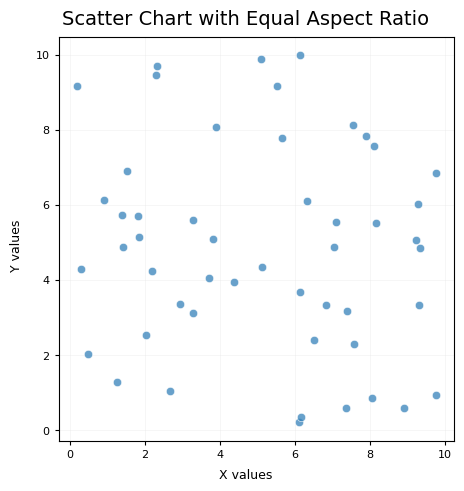

In [19]:
_ = ScatterChart(
    data=chart_data,
    # set equal aspect ratio
    aspect_ratio="equal",
    title="Scatter Chart with Equal Aspect Ratio",
    xlabel="X values",
    ylabel="Y values",
    figsize=FIG_SIZE.SQUARE_SMALL,
    show_grid=SHOW_GRID.BOTH,
)

### Adding vertical and horizontal lines


**Adding vertical lines.** Use the `vlines` argument with the [datachart.typings.VLinePlotAttrs](/references/typings/#datachart.typings.VLinePlotAttrs) typing, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "x":    Union[int, float],                 # The x-axis value
  "ymin": Optional[Union[int, float]],       # The minimum y-axis value
  "ymax": Optional[Union[int, float]],       # The maximum y-axis value
  "style": {                                 # The style of the line (optional)
    "plot_vline_color": Optional[str],       # The color of the line (hex color code)
    "plot_vline_style": Optional[LineStyle], # The line style (solid, dashed, etc.)
    "plot_vline_width": Optional[float],     # The width of the line
    "plot_vline_alpha": Optional[float],     # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                    # The label of the line
}
```

**Adding horizontal lines.** Use the `hlines` argument with the [datachart.typings.HLinePlotAttrs](/references/typings/#datachart.typings.HLinePlotAttrs) typing, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "y":    Union[int, float],                 # The y-axis value
  "xmin": Optional[Union[int, float]],       # The minimum x-axis value
  "xmax": Optional[Union[int, float]],       # The maximum x-axis value
  "style": {                                 # The style of the line (optional)
    "plot_hline_color": Optional[str],       # The color of the line (hex color code)
    "plot_hline_style": Optional[LineStyle], # The line style (solid, dashed, etc.)
    "plot_hline_width": Optional[float],     # The width of the line
    "plot_hline_alpha": Optional[float],     # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                    # The label of the line
}
```


To add vertical and horizontal lines, simply add the `vlines` and `hlines` arguments.


In [20]:
from datachart.constants import LINE_STYLE

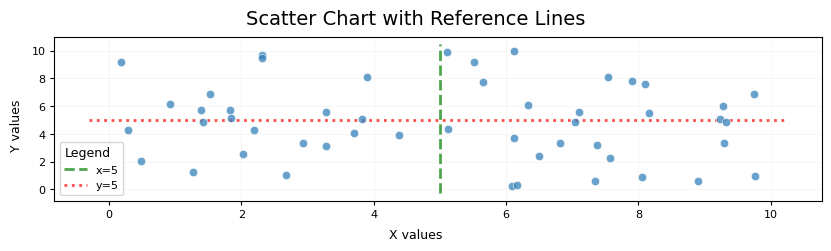

In [21]:
_ = ScatterChart(
    data=chart_data,
    # add vertical lines
    vlines=[
        {
            "x": 5,
            "style": {
                "plot_vline_color": "green",
                "plot_vline_style": LINE_STYLE.DASHED,
                "plot_vline_width": 2,
            },
            "label": "x=5",
        }
    ],
    # add horizontal lines
    hlines=[
        {
            "y": 5,
            "style": {
                "plot_hline_color": "red",
                "plot_hline_style": LINE_STYLE.DOTTED,
                "plot_hline_width": 2,
            },
            "label": "y=5",
        }
    ],
    title="Scatter Chart with Reference Lines",
    xlabel="X values",
    ylabel="Y values",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
    show_legend=True,
)

## Multiple Scatter Charts

To create multiple scatter charts, pass a list of lists to the `data` argument. Each inner list represents the data for one chart. Per-chart attributes like `subtitle` and `style` can be passed as lists, where each element corresponds to a chart.

<div class="admonition note">
    <p class="admonition-title">Multiple charts pattern</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        For multiple charts, <code>data</code> becomes a list of lists, and per-chart attributes like <code>subtitle</code> and <code>style</code> become lists where each element applies to the corresponding chart.
    </p>
</div>


In [22]:
# the data is now a list of lists (one per chart)
multi_chart_data = [
    [
        {"x": random.uniform(0, 10), "y": random.uniform(0, 10)}
        for _ in range(NUM_OF_POINTS)
    ]
    for _ in range(3)
]

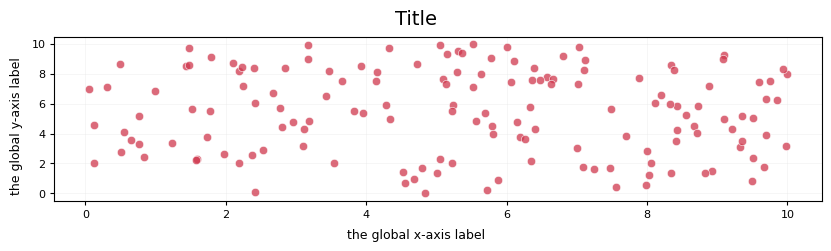

In [23]:
_ = ScatterChart(
    # use a list of lists to define multiple scatter charts
    data=multi_chart_data,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
)

### Sub-chart subtitles

We can name each chart by passing a list of subtitles to the `subtitle` argument. In addition, to help with discerning which chart is which, use the `show_legend` argument to show the legend of the charts.


In [24]:
# define subtitles for each chart
chart_subtitles = [f"Dataset {idx+1}" for idx in range(len(multi_chart_data))]


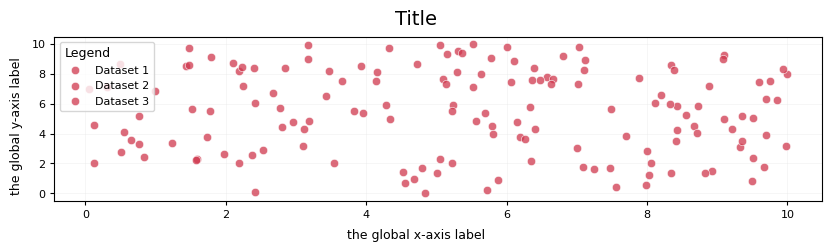

In [25]:
_ = ScatterChart(
    data=multi_chart_data,
    # add a subtitle to each chart
    subtitle=chart_subtitles,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
    # show the legend
    show_legend=True,
)

### Subplots

To draw multiple charts in each subplot, simply add the `subplots` attribute. The chart's `subtitle` are then added at the top of each subplot, while the `title`, `xlabel` and `ylabel` are positioned to be global for all charts.


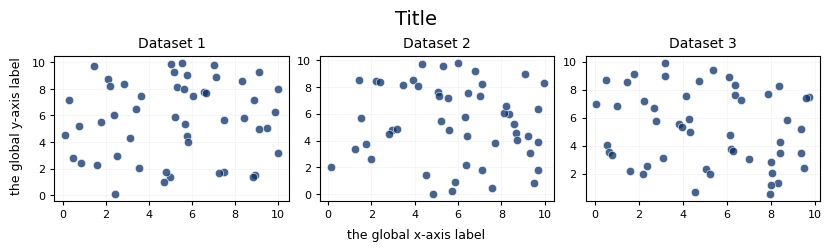

In [26]:
_ = ScatterChart(
    data=multi_chart_data,
    subtitle=chart_subtitles,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
    # show each chart in its own subplot
    subplots=True,
)

### Sharing the x-axis and/or y-axis across subplots

To share the x-axis and/or y-axis across subplots, simply add the `sharex` and/or `sharey` attributes, which are boolean values that specify whether to share the axis across all subplots.


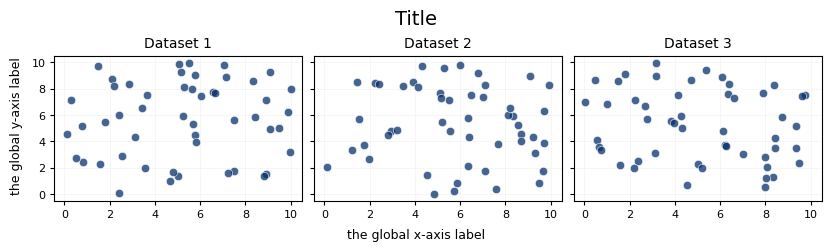

In [27]:
_ = ScatterChart(
    data=multi_chart_data,
    subtitle=chart_subtitles,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
    subplots=True,
    # share the x-axis across subplots
    sharex=True,
    # share the y-axis across subplots
    sharey=True,
)

## Additional Features


### Axis scales

The user can change the axis scale using the `scalex` and `scaley` attributes. The supported scale options are:

| Options      | Description |
| :----------- | :---------- |
| `"linear"`   | The linear scale.              |
| `"log"`      | The log scale.                 |
| `"symlog"`   | The symmetric log scale.       |
| `"asinh"`    | The asinh scale.               |

Again, to help with the options settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant        | Description |
| :-------------- | :---------- |
| [datachart.constants.SCALE](/references/constants/#datachart.constants.SCALE) | The axis options. |


In [28]:
from datachart.constants import SCALE


In [29]:
# create data with exponential relationship for log scale demonstration
chart_data_exp = [
    {"x": x, "y": 10 ** (x / 3) + random.uniform(0, 10)}
    for x in np.linspace(1, 10, NUM_OF_POINTS)
]

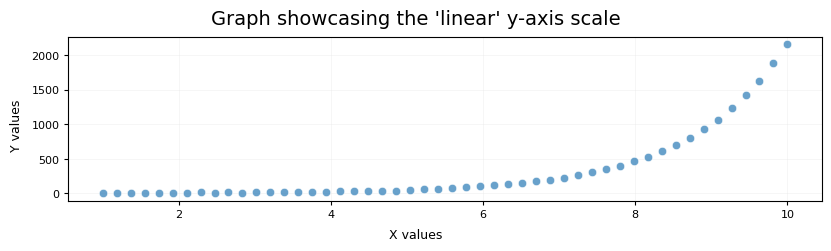

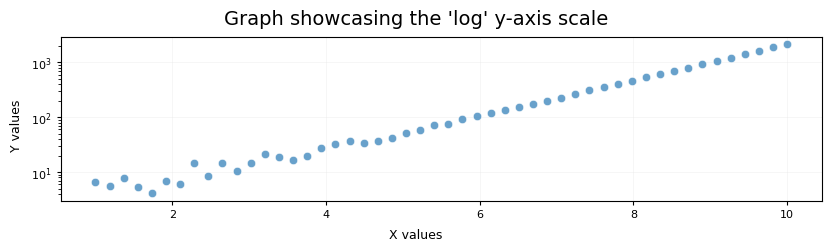

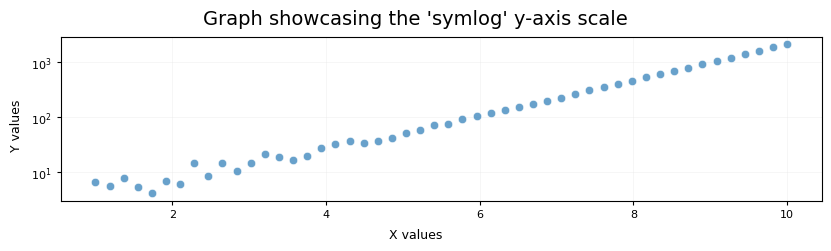

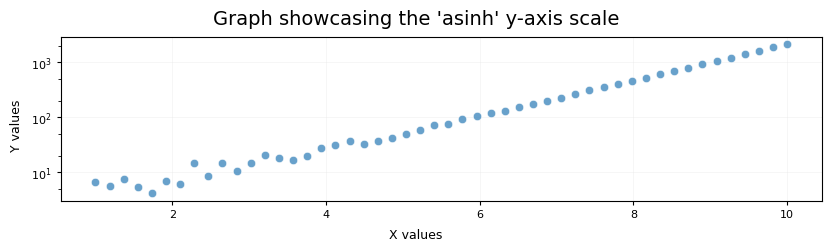

In [30]:
for scale in [SCALE.LINEAR, SCALE.LOG, SCALE.SYMLOG, SCALE.ASINH]:
    figure = ScatterChart(
        data=chart_data_exp,
        title=f"Graph showcasing the '{scale}' y-axis scale",
        xlabel="X values",
        ylabel="Y values",
        figsize=FIG_SIZE.A4_NARROW,
        show_grid=SHOW_GRID.BOTH,
        # set the scale of the y axis
        scaley=scale,
    )

### Custom key names

By default, the `ScatterChart` function expects the data dictionaries to have keys named `"x"` and `"y"`. You can use the `x`, `y`, `size`, and `hue` parameters to specify different key names in your data.


In [31]:
# data with custom key names
chart_data_custom = [
    {
        "temperature": random.uniform(15, 35),
        "sales": random.uniform(100, 500),
        "store_size": random.uniform(50, 200),
        "region": random.choice(["Urban", "Suburban", "Rural"])
    }
    for _ in range(NUM_OF_POINTS)
]

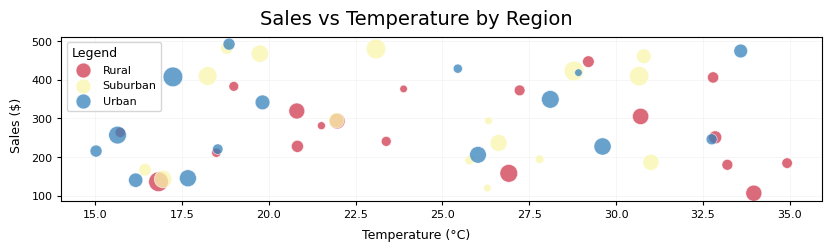

In [32]:
_ = ScatterChart(
    data=chart_data_custom,
    # specify custom key names
    x="temperature",
    y="sales",
    size="store_size",
    hue="region",
    size_range=(30, 200),
    title="Sales vs Temperature by Region",
    xlabel="Temperature (°C)",
    ylabel="Sales ($)",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
    show_legend=True,
)

## Saving the Chart as an Image

To save the chart as an image, use the [datachart.utils.save_figure](/references/utils#datachart.utils.save_figure) function.


In [33]:
from datachart.utils import save_figure

In [34]:
save_figure(figure, "./fig_scatter_chart.png", dpi=300)

The figure should be saved in the current working directory.


# Practical Examples

### Model Performance by Size

This example demonstrates a realistic use case: visualizing model performance across different model sizes. We'll simulate performance data for models of different parameter counts (4B, 8B, 12B, and 27B parameters) and their corresponding accuracy scores. Each model size will be displayed with a distinct color to make comparisons easy.


In [35]:
# Define model sizes and their expected accuracy ranges
model_sizes = [4, 8, 12, 27]  # in billions of parameters
model_labels = ["4B", "8B", "12B", "27B"]

# Generate simulated performance data
# Larger models generally perform better, with some variance
model_performance_data = []
points_per_model = 4

for model_size, model_label in zip(model_sizes, model_labels):
    # Base accuracy increases with model size, with some variance
    if model_size == 4:
        base_accuracy = 67.5
        accuracy_range = 15
    elif model_size == 8:
        base_accuracy = 77.5
        accuracy_range = 15
    elif model_size == 12:
        base_accuracy = 85.0
        accuracy_range = 10
    else:  # 27B
        base_accuracy = 90.0
        accuracy_range = 10

    for _ in range(points_per_model):
        # Generate accuracy with some noise/variance
        accuracy = base_accuracy + random.gauss(0, accuracy_range / 3)
        # Clamp to 0-100 range
        accuracy = max(0, min(100, accuracy))

        model_performance_data.append({
            "x": model_size,
            "y": accuracy,
            "model_size": model_label
        })


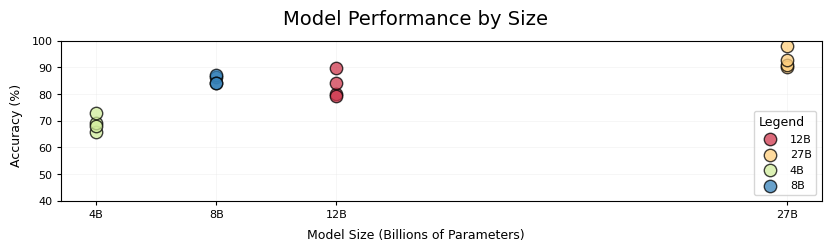

In [36]:
_ = ScatterChart(
    data=model_performance_data,
    # use hue to color each model size differently
    hue="model_size",
    # style the markers for better visibility
    style={
        "color_general_"
        "plot_scatter_alpha": 0.9,
        "plot_scatter_size": 80,
        "plot_scatter_edge_width": 1,
        "plot_scatter_edge_color": "#000000",
    },
    ymin=40,
    ymax=100,
    xticks=model_sizes,
    xticklabels=model_labels,
    title="Model Performance by Size",
    xlabel="Model Size (Billions of Parameters)",
    ylabel="Accuracy (%)",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.BOTH,
    # show legend to identify each model size
    show_legend=True,
)
